In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, GroupKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.svm import SVC
import seaborn as sns
from joblib import dump

RANDOM_STATE = 42

In [2]:
df = pd.read_csv("../data/audio/processed/audio_features.csv")

# cool visual for presenttion
# y, sr = librosa.load("../data/audio/raw/Lisa_01.wav", sr=22050)
# S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# S_db = librosa.power_to_db(S, ref=np.max)
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel Spectrogram')
# plt.tight_layout()
# plt.show()

In [3]:
# slplit data into tain/testing + encode speaker names
x = df.drop(columns=["speaker", "session"], axis=1)
y = df["speaker"]
y_encoded = df["speaker"].map({"Drake":0, "Melissa":1, "Lisa":2, "Dan":3, "David":4, "Nicole":5})
groups = df["session"]

# auto target encoding?
# label_encoder = LabelEncoder()
# y_encoded2 = label_encoder.fit_transform(y)
# print("Classes:", label_encoder.classes_)

# feature correlations:
# mi = mutual_info_classif(x, y_encoded)

# # Create a DataFrame to view the results
# mi_df = pd.DataFrame({"Feature": x.columns, "Mutual Information": mi})
# mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)
# print(mi_df)

Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /dev/shm/joblib_memmapping_folder_6228_e70cbc3be9aa4e6fbe4378298a0a53b9_62335f87d4ad4af9922c1a80a870f89e for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-6228-amx9ro_4 for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 

SVC:
Best F1: 0.7746556382689768
Best Params: {'classifier__C': 10, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'selector__k': 'all'}


Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /dev/shm/joblib_memmapping_folder_6228_570c5dd326004be79740d1b72e5f177b_f8bcc17a2a134e09bd2fe75c3ff985ed for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /dev/shm/joblib_memmapping_folder_6228_e70cbc3be9aa4e6fbe4378298a0a53b9_d95de3710f52452492a4c2381d3b286a for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/home/davb001/minicon

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1196
           1       0.90      0.88      0.89       958
           2       0.97      0.97      0.97      1257
           3       0.99      0.99      0.99      1916
           4       0.97      0.98      0.98      1375
           5       0.92      0.91      0.92      1196

    accuracy                           0.96      7898
   macro avg       0.95      0.95      0.95      7898
weighted avg       0.96      0.96      0.96      7898



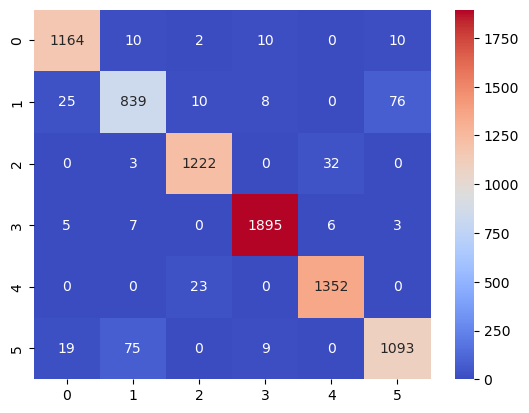

Fold 0 [0.94736765 0.95499441 0.8950201  0.90670825 0.94736765 0.95499441
 0.8950201  0.90670825 0.94736765 0.95499441 0.93223143 0.93259186
 0.94736765 0.95499441 0.93223143 0.93259186 0.94617281 0.9543355
 0.8812404  0.90330103 0.94617281 0.9543355  0.8812404  0.90330103
 0.94617281 0.9543355  0.9348412  0.93259179 0.94617281 0.9543355
 0.9348412  0.93259179 0.94542761 0.95396582 0.86444022 0.89815223
 0.94542761 0.95396582 0.86444022 0.89815223 0.94542761 0.95396582
 0.93355791 0.93442536 0.94542761 0.95396582 0.93355791 0.93442536
 0.94511134 0.95396582 0.86036801 0.89734318 0.94511134 0.95396582
 0.86036801 0.89734318 0.94511134 0.95396582 0.93434076 0.935283
 0.94511134 0.95396582 0.93434076 0.935283  ]
Fold 1 [0.93093453 0.94220968 0.90808953 0.91808615 0.93093453 0.94220968
 0.90808953 0.91808615 0.93093453 0.94220968 0.93034375 0.94241318
 0.93093453 0.94220968 0.93034375 0.94241318 0.92860771 0.94231857
 0.90110215 0.91516182 0.92860771 0.94231857 0.90110215 0.91516182
 0.928

Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-6228-c72v4dpc for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-6228-f_i02zgx for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/home/davb001/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cl

In [4]:
# Makes sure we don't get data leakage (splits folds based on session not rows)
gkfolds = GroupKFold(5)

# Gradient Boosted Classifier
# gb_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('selector', SelectKBest(mutual_info_classif)),
#     ('classifier', GradientBoostingClassifier(random_state=RANDOM_STATE))
# ])
    
# gb_grid = {
#     "selector__k": [20,30,40,"all"],
#     "classifier__n_estimators": [100, 200],
#     "classifier__learning_rate": [0.01, 0.05, 0.1],
#     "classifier__max_depth": [2, 3]
# }

# gb_search = GridSearchCV(gb_pipe, gb_grid, scoring="f1_macro", cv=gkfolds, n_jobs=-1)
# gb_search.fit(x, y_encoded, groups=groups)
# print("Gradient Boosting:")
# print(f"Best F1 Score: {gb_search.best_score_}")
# print(f"Best Params: {gb_search.best_params_}")

# SVC Classifier 
svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(mutual_info_classif, k="all")),
    ('classifier', SVC(probability=True))
])

svc_grid = {
    "selector__k": [30, "all"],
    "classifier__C": [5, 10, 25, 35],
    "classifier__gamma": ["scale", "auto"],
    "classifier__kernel": ["rbf", "poly"],
    "classifier__degree": [2, 3]
}

svc_search = GridSearchCV(svc_pipe, svc_grid, scoring="f1_macro", cv=gkfolds, n_jobs=-1)
svc_search.fit(x, y_encoded, groups=groups)
print("SVC:")
print(f"Best F1: {svc_search.best_score_}")
print(f"Best Params: {svc_search.best_params_}")

# XGBoost Classifier
# xgboost_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('selector', SelectKBest(mutual_info_classif)),
#     ('classifier', XGBClassifier(
#         n_estimators=300,
#         n_jobs=1,
#         eval_metric="mlogloss",
#         tree_method="hist",
#         random_state=RANDOM_STATE
#     ))
# ])

# xgboost_grid = {
#     "selector__k": [20,"all"],
#     "classifier__n_estimators": [200, 300],
#     "classifier__max_depth": [3, 5],
#     "classifier__learning_rate": [0.05, 0.1],
#     "classifier__subsample": [0.7, 0.8],
#     "classifier__colsample_bytree": [0.7, 0.8]
# }

# xgboost_search = GridSearchCV(xgboost_pipe, xgboost_grid, scoring="f1_macro", cv=gkfolds, n_jobs=1, verbose=True)
# xgboost_search.fit(x, y_encoded, groups=groups)
# print("XGBoost...")
# print(f"Best F1: {xgboost_search.best_score_}")
# print(f"Best Params: {xgboost_search.best_params_}")

# best model -> xgboost 
best_model = svc_search.best_estimator_

# confusion matrix/metric report
y_predictedCV = cross_val_predict(svc_pipe, x, y_encoded, cv=gkfolds, groups=groups, n_jobs=-1)
print(classification_report(y_encoded, y_predictedCV))
cmatrix = confusion_matrix(y_encoded, y_predictedCV)
sns.heatmap(cmatrix, annot=True, cmap='coolwarm', fmt='d')
plt.show()

for i in range(5):
    print("Fold", i, svc_search.cv_results_[f"split{i}_test_score"])



# print selected features:
# select_k_best = svc_search.best_estimator_.named_steps['selector']
# selected_indices = select_k_best.get_support(indices=True)
# Map the indices back to the feature names (from x)
# selected_features = x.columns[selected_indices]
# print("Selected Features:", selected_features)

# heat map of top 10 selected features
# top10_selected_feats = selected_features[:10]
# corr_top10 = x[top10_selected_feats].corr()
# plt.figure(figsize=(10,8))
# sns.heatmap(corr_top10, annot=True, cmap='coolwarm')
# plt.show()

In [10]:
dump(best_model, "speech_rec_model.pkl")

['speech_rec_model.pkl']